# CBE 562 Homework 3

#### Tyson Wheelwright

## Problem 1

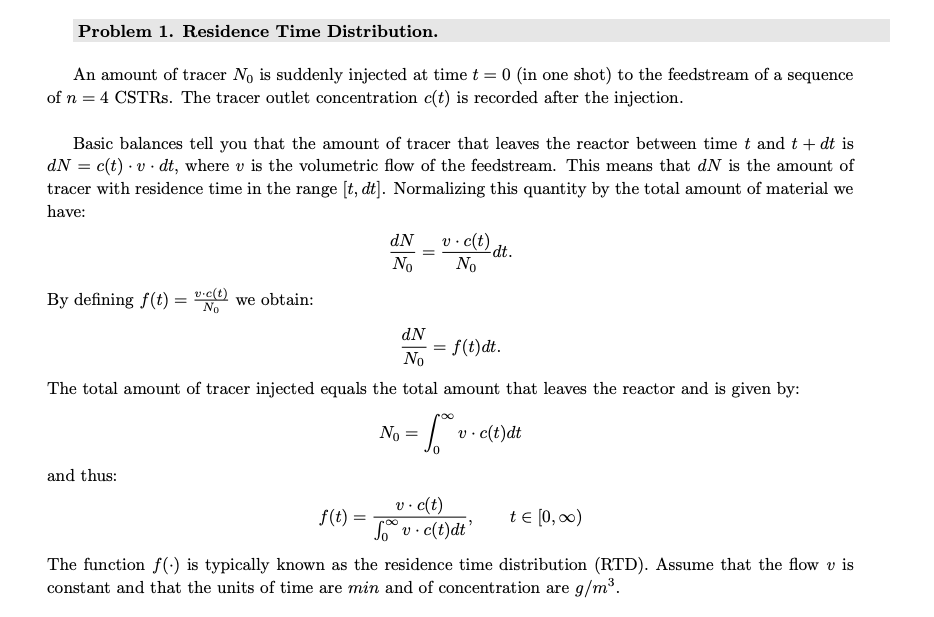

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import cumtrapz
import seaborn as sns

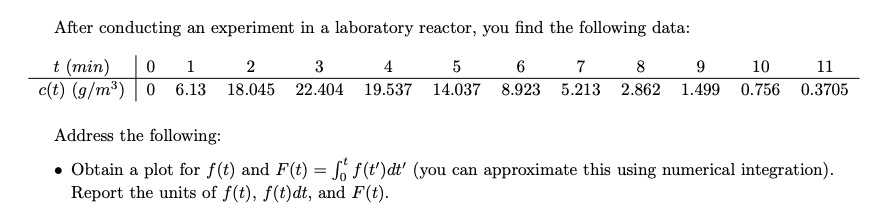

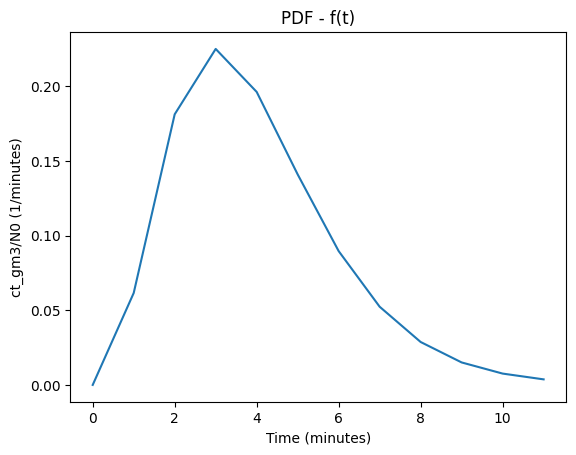

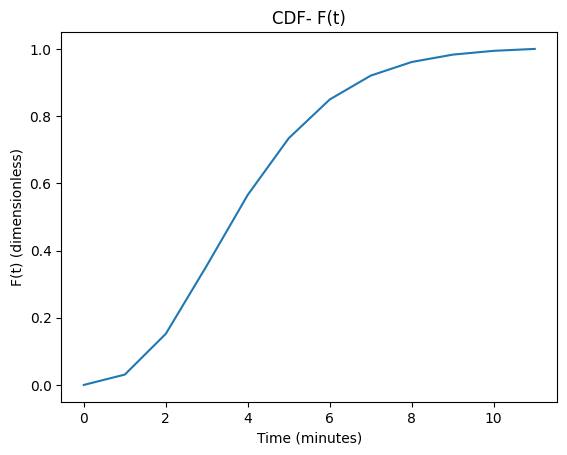

In [26]:
data = {'time_mins': [x for x in range(12)], 
        'ct_gm3': [0,6.13, 18.045, 22.404, 19.537, 14.037, 8.923, 5.213, 2.862, 1.499, 0.756, 0.3705]}
df = pd.DataFrame.from_dict(data)


N0 = np.trapz(df['ct_gm3'], df['time_mins'])
#x= time y=ct_gm3/N0

df['pdf'] = df['ct_gm3'] / N0
df['cdf'] = cumtrapz(df['ct_gm3'], x=df['time_mins'], initial=0) / N0


plt.plot(df['time_mins'], df['pdf'])
plt.title('PDF - f(t)')
plt.xlabel('Time (minutes)')
plt.ylabel('ct_gm3/N0 (1/minutes)')
plt.show()
plt.plot(df['time_mins'], df['cdf'])
plt.title('CDF- F(t)')
plt.xlabel('Time (minutes)')
plt.ylabel('F(t) (dimensionless)')
plt.show()

UNITS:  
units: f(t) = 1/time  
units: F(t) = no units  
unites: f(t)dt = no units  

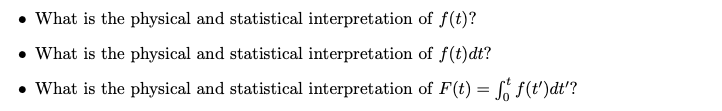

f(t) physically is the normalized amount of dye that we read after each minute (so kind of the flow?). Statistically it's the Probability Density Function, so the event happening at that time.    
f(t)dt physically is the sum of the flows up to a certain time point. Stats-wise it's the probability of finding dye between two timepoints.     
F(t) physically it is the total amount of dye that flows over the entire run. Statistically it's the Commulative Probability Distribution.  

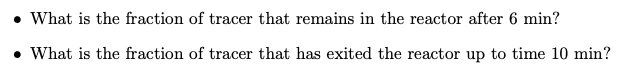

In [29]:
min6_fract = 1 - df['cdf'][6]
min10_fract = df['cdf'][10]
print(f'{min6_fract = :.4f}\n{min10_fract = :.4f}')

min6_fract = 0.1504
min10_fract = 0.9943


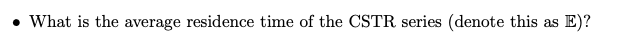

In [31]:
E = np.trapz(df['time_mins'], df['cdf'])
print(f'{E = :.4f} mins')

E = 3.9530 mins


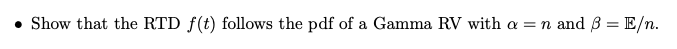

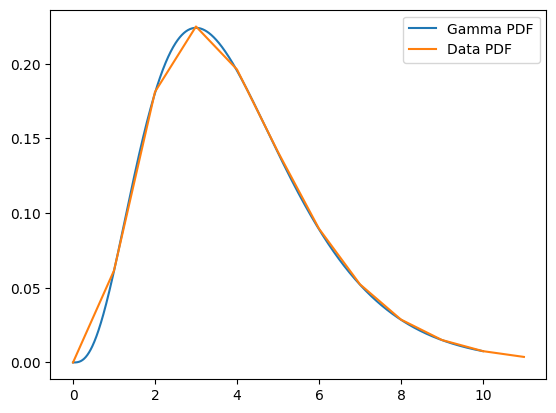

In [39]:
# Define the parameters
a = 4
b = 3.953 / 4

# Create a range of x values for the plot
x = np.linspace(0, 10, 1000)

gamma_pdf = stats.gamma.pdf(x, a)

plt.plot(x, gamma_pdf, label='Gamma PDF')
plt.plot(df['time_mins'], df['pdf'], label='Data PDF')
plt.legend()
plt.show()

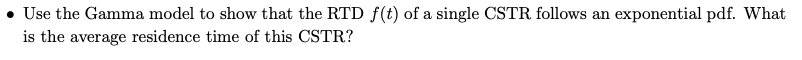

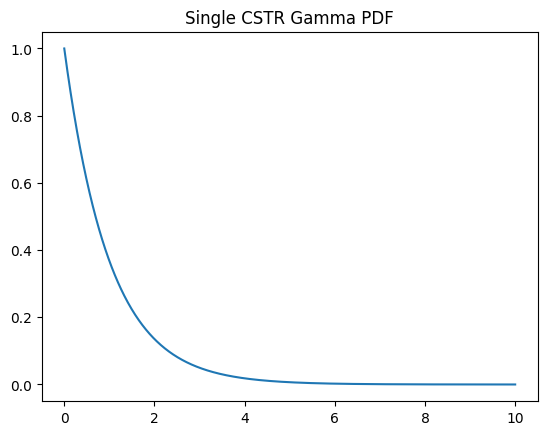

E = 3.9530 mins


In [44]:
# Define the parameters
a = 1
b = 3.953 

# Create a range of x values for the plot
x = np.linspace(0, 10, 1000)

gamma_pdf = stats.gamma.pdf(x, a)

plt.plot(x, gamma_pdf, label='Gamma PDF')
plt.title('Single CSTR Gamma PDF')
plt.show()

#average residente time of a single CSTR
E = a*b
print(f'{E = :.4f} mins')

## Problem 2

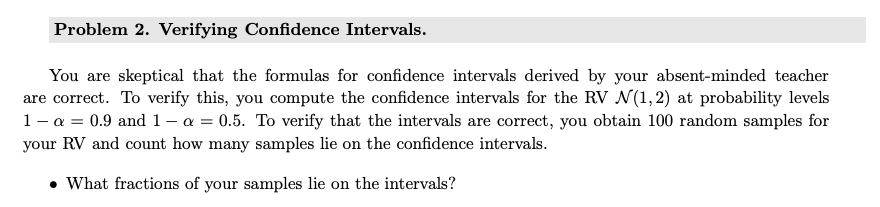

In [10]:
#first let's build the normal distribution:
mu = 1
sigma = 2
sample_size = 100
a1 = 0.1 #we just found alpha
a2 = 0.5

#now let's get the samples using numpy
def cal_frac(sample_size):
    np.random.seed = 19
    samples = np.random.normal(mu, sigma, sample_size)
    conf_inv_90 = stats.norm.interval(1 - a1, loc=mu, scale=sigma)
    conf_inv_50 = stats.norm.interval(1 - a2, loc=mu, scale=sigma)
    sum_90 = np.sum((samples >= conf_inv_90[0]) & (samples <= conf_inv_90[1]))
    sum_50 = np.sum((samples >= conf_inv_50[0]) & (samples <= conf_inv_50[1]))
    frac_90 = sum_90 / sample_size
    frac_50 = sum_50 / sample_size
    return(frac_90, frac_50)


frac_90_for_100_samples, frac_50_for_100_samples = cal_frac(100)
print(f'{frac_90_for_100_samples = }\n{frac_50_for_100_samples = }')

frac_90_for_100_samples = 0.94
frac_50_for_100_samples = 0.55


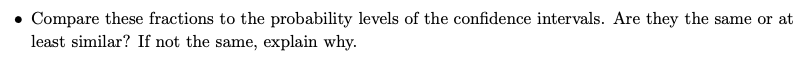

In [20]:
#confidence intervals
prob_a1 = 0.9
prob_a2 = 0.5
print(f'{prob_a1 = }\n{prob_a2 = }')
diff_a1_100s = np.abs(frac_90_for_100_samples - prob_a1)
diff_a2_100s = np.abs(frac_50_for_100_samples - prob_a2)
print(f'{diff_a1_100s = :.2f}\n{diff_a2_100s = :.2f}')

prob_a1 = 0.9
prob_a2 = 0.5
diff_a1_100s = 0.04
diff_a2_100s = 0.05


They're close. only about 0.05 off on each

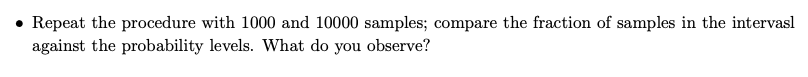

difference goes down at 1000

In [21]:
frac_90_for_1000_samples, frac_50_for_1000_samples = cal_frac(1000)
print(f'{frac_90_for_1000_samples = }\n{frac_50_for_1000_samples = }')
print(f'{prob_a1 = }\n{prob_a2 = }')
diff_a1_1000s = np.abs(frac_90_for_1000_samples - prob_a1)
diff_a2_1000s = np.abs(frac_50_for_1000_samples - prob_a2)
print(f'{diff_a1_1000s = :.2f}\n{diff_a2_1000s = :.2f}')

frac_90_for_1000_samples = 0.874
frac_50_for_1000_samples = 0.482
prob_a1 = 0.9
prob_a2 = 0.5
diff_a1_1000s = 0.03
diff_a2_1000s = 0.02


In [22]:
frac_90_for_10000_samples, frac_50_for_10000_samples = cal_frac(10000)
print(f'{frac_90_for_10000_samples = }\n{frac_50_for_10000_samples = }')
print(f'{prob_a1 = }\n{prob_a2 = }')
diff_a1_10000s = np.abs(frac_90_for_10000_samples - prob_a1)
diff_a2_10000s = np.abs(frac_50_for_10000_samples - prob_a2)
print(f'{diff_a1_10000s = :.2f}\n{diff_a2_10000s = :.2f}')

frac_90_for_10000_samples = 0.9032
frac_50_for_10000_samples = 0.4964
prob_a1 = 0.9
prob_a2 = 0.5
diff_a1_10000s = 0.00
diff_a2_10000s = 0.00


difference is 0.00 now

## Problem 3

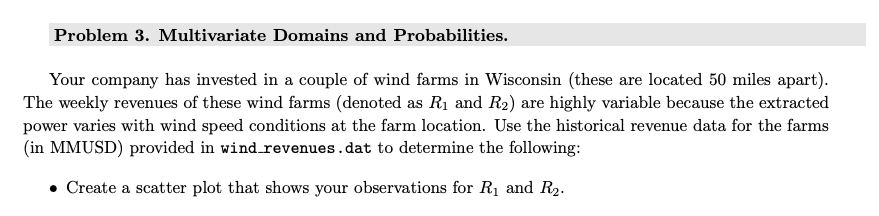

<Axes: xlabel='week_num', ylabel='rev'>

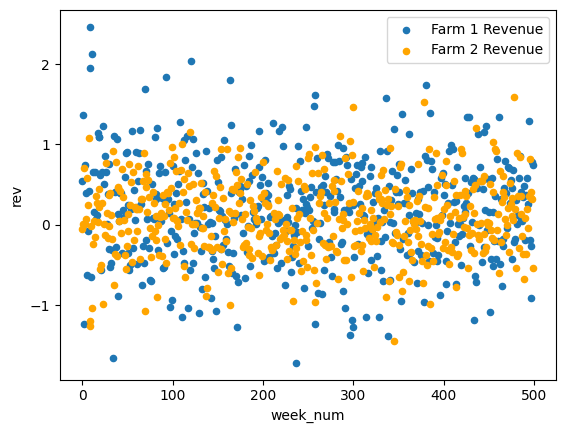

In [57]:
df = pd.read_csv('../Matlab/Data/wind_revenues.dat', delimiter='\s+', header=None, names=['farm1_rev','farm2_rev'])
wind_revenues1 = df['farm1_rev'].values
wind_revenues2 = df['farm2_rev'].values
df['week_num'] = df.index.values

# # #make a scatter plot of the farms over time
# df.plot.scatter(x='week_num', y='farm1_rev')
# df.plot.scatter(x='week_num', y='farm2_rev')

ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax)

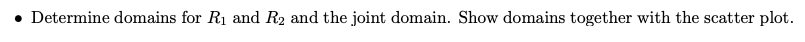

R1_domain = (-1.71582, 2.4631769)
R2_domain = (-1.4389569, 1.5929869)
joint_domain = (-1.71582, 2.4631769)


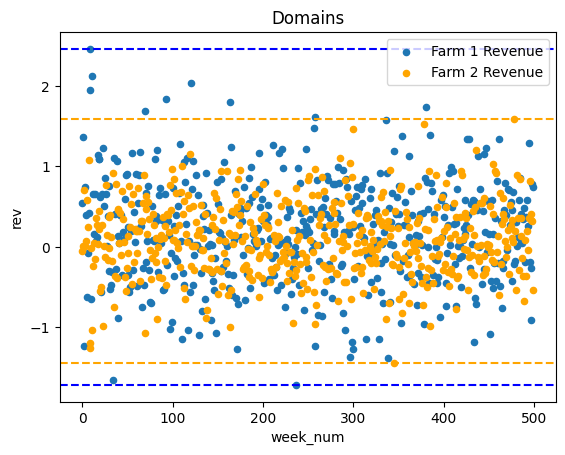

In [65]:
R1_domain = wind_revenues1.min(), wind_revenues1.max()
R2_domain = wind_revenues2.min(), wind_revenues2.max()
joint_domain = min(R1_domain[0], R2_domain[0]), max(R1_domain[1], R2_domain[1])
print(f'{R1_domain = }\n{R2_domain = }\n{joint_domain = }')

#.... I'm confused about how to show the domains on the plot
#I'll just draw lines?
ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax, title='Domains')
plt.axhline(R1_domain[0], color='blue', linestyle='--', label=f'R1 Domain')
plt.axhline(R1_domain[1], color='blue', linestyle='--')
plt.axhline(R2_domain[0], color='orange', linestyle='--', label=f'R2 Domain')
plt.axhline(R2_domain[1], color='orange', linestyle='--')

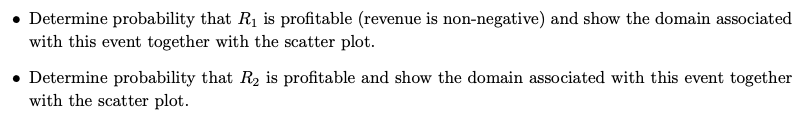

R1_profitable_prob = 0.65


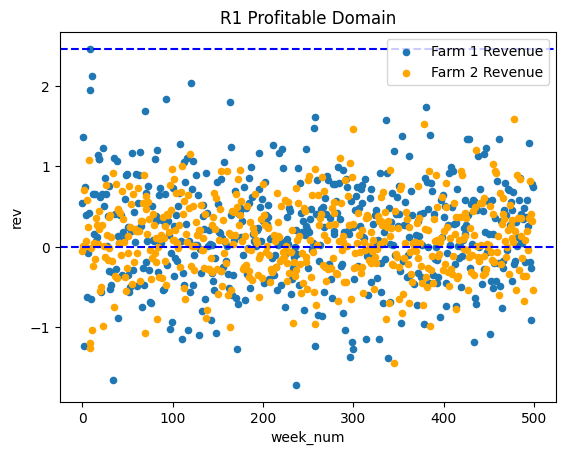

In [66]:
#probability that R1 is profitable
R1_profitable = wind_revenues1 > 0
R1_profitable_prob = np.sum(R1_profitable) / len(R1_profitable)
print(f'{R1_profitable_prob = :.2f}')

ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax, title='R1 Profitable Domain')
plt.axhline(0, color='blue', linestyle='--', label=f'R1 Domain')
plt.axhline(R1_domain[1], color='blue', linestyle='--')

R2_profitable_prob = 0.65


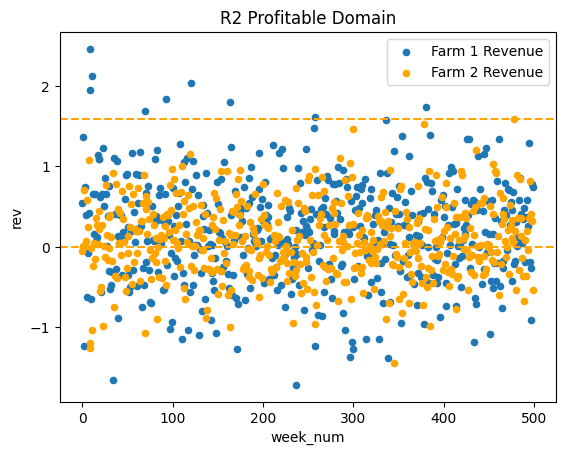

In [67]:
R2_profitable = wind_revenues1 > 0
R2_profitable_prob = np.sum(R2_profitable) / len(R2_profitable)
print(f'{R2_profitable_prob = :.2f}')

ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax, title='R2 Profitable Domain')
plt.axhline(0, color='orange', linestyle='--', label=f'R1 Domain')
plt.axhline(R2_domain[1], color='orange', linestyle='--')

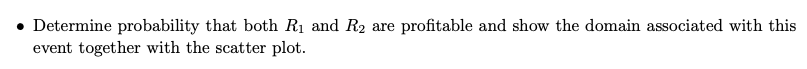

R1_and_R2_profitable_prob = 0.65


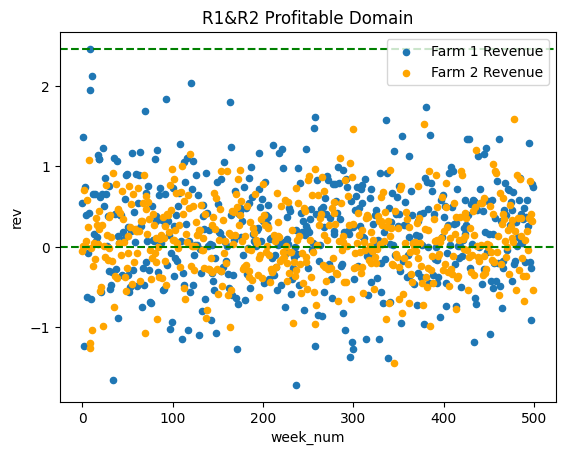

In [73]:
#determine the probability that both farms are profitable
#joint probability... ?
R1_and_R2_profitable_prob = (R1_profitable & R2_profitable).sum() / len(df)
print(f'{R1_and_R2_profitable_prob = :.2f}')

ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax, title='R1&R2 Profitable Domain')
plt.axhline(0, color='green', linestyle='--', label=f'R1 Domain')
plt.axhline(R1_domain[1], color='green', linestyle='--')

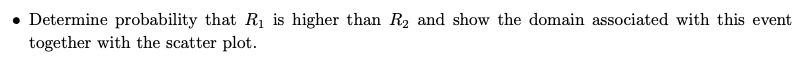

R1_higher_prob = 0.54


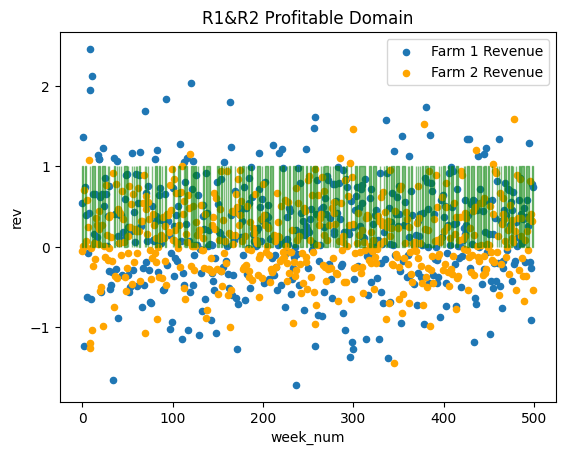

In [80]:
#probability that R1 is higher.... 
R1_higher_prob = (wind_revenues1 > wind_revenues2).mean()
print(f'{R1_higher_prob = :.2f}')


ax = df.plot(x='week_num', y='farm1_rev', kind='scatter', label='Farm 1 Revenue')
df.plot(x='week_num', y='farm2_rev', kind='scatter', label='Farm 2 Revenue', ylabel='rev', color='orange', ax=ax, title='R1&R2 Profitable Domain')
# plt.axhline(0, color='green', linestyle='--', label=f'R1 Domain')
# plt.axhline(R1_domain[1], color='green', linestyle='--')
df['R1_larger'] = wind_revenues1 > wind_revenues2

plt.fill_between(df['week_num'], 0, 1, where=df['R1_larger'], alpha=0.5, color='green', label='R1 is larger than R2 on average region')

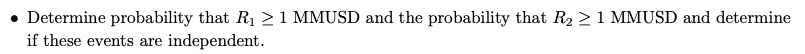

In [85]:
#probability that R1 is larger than 1
R1_larger_than_1_prob = (wind_revenues1 > 1).mean()
print(f'{R1_larger_than_1_prob = :.2f}')
R2_large_than_1_prob = (wind_revenues2 > 1).mean()
print(f'{R2_large_than_1_prob = :.2f}')

#determine that these events are independent
independance_score = R1_larger_than_1_prob * R2_large_than_1_prob
print(f'{independance_score = :.2f}')
print("It looks like they're independent.")

R1_larger_than_1_prob = 0.09
R2_large_than_1_prob = 0.02
independance_score = 0.00
It looks like they're independent.


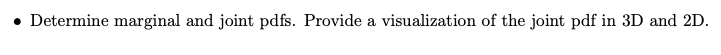

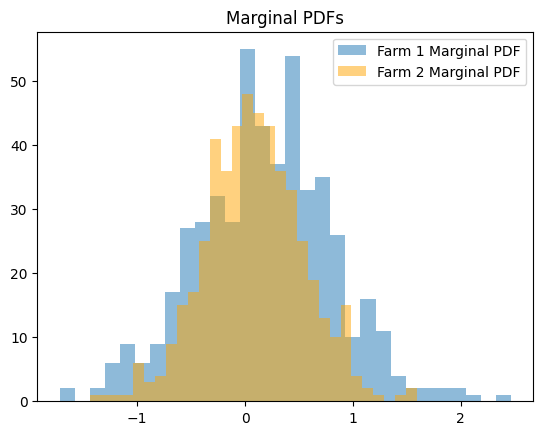

2D joint pdf


Text(0.5, 0.92, '3D joint pdf')

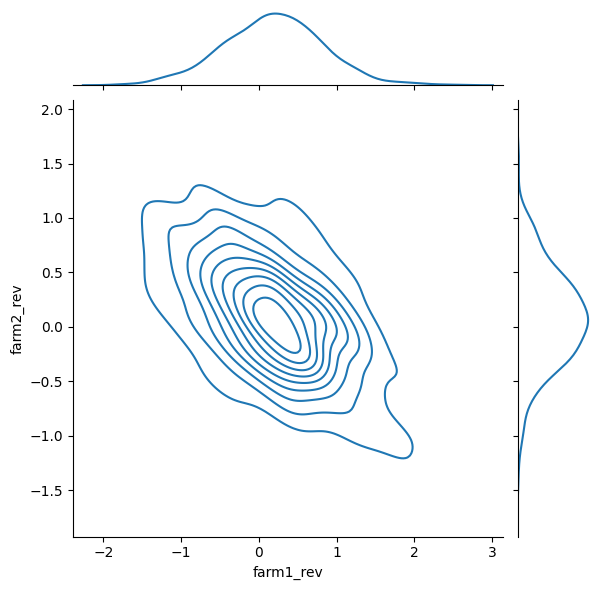

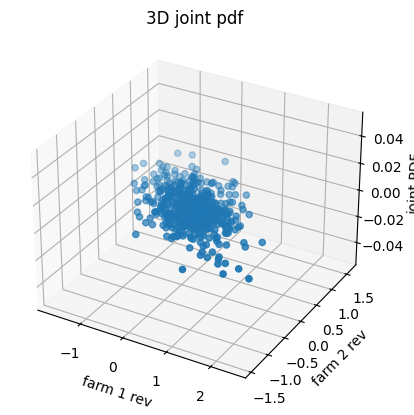

In [106]:
#marginals are just each of the pdfs
plt.hist(df['farm1_rev'], bins=30, label='Farm 1 Marginal PDF', alpha=0.5)
plt.hist(df['farm2_rev'], bins=30, color='orange', label='Farm 2 Marginal PDF', alpha=0.5)
plt.legend()
plt.title('Marginal PDFs')
plt.show()

#joint pdf in 2D
print('2D joint pdf')
sns.jointplot(data=df, x='farm1_rev', y='farm2_rev', kind='kde')

# 3D plot I hope scatter is okay
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(df['farm1_rev'], df['farm2_rev'])
ax.set_xlabel('farm 1 rev')
ax.set_ylabel('farm 2 rev')
ax.set_zlabel('joint PDF')
ax.set_title('3D joint pdf')